In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

%matplotlib inline

In [21]:
# Valores "reales" de los parametros
m_true = -0.9594
b_true = 4.294
f_true = 0.534

#Datos sinteticos para el modelo
N = 50
x = np.sort(10*np.random.rand(N))
yerr = 0.1+0.5*np.random.rand(N)
y = m_true*x+b_true
y += np.abs(f_true*y) * np.random.randn(N)
y += yerr * np.random.randn(N)

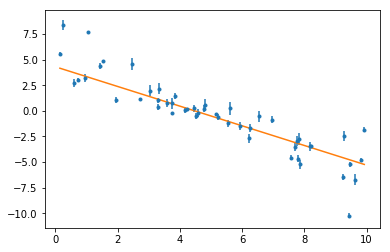

In [24]:
fx_true = m_true * x + b_true
plt.errorbar(x, y, yerr = yerr, fmt = '.')
plt.plot(x, fx_true)

(-1.2504336593889136, 6.085609329351007)


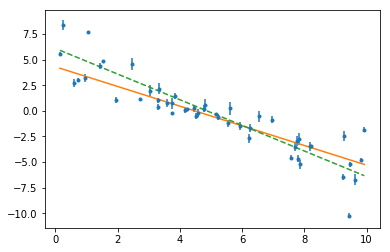

In [26]:
A = np.vstack((np.ones_like(x), x)).T
C = np.diag(yerr * yerr)
cov = np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A)))
b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))

fx_ls = m_ls * x + b_ls
plt.errorbar(x, y, yerr = yerr, fmt = '.')
plt.plot(x, fx_true)
plt.plot(x, fx_ls, '--')

print(m_ls, b_ls)

In [29]:
def lnlike(theta, x, y, yerr):
    m, b, lnf = theta
    model = m * x + b
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2))) # - np.log(inv_sigma2/(2*pi)) ???

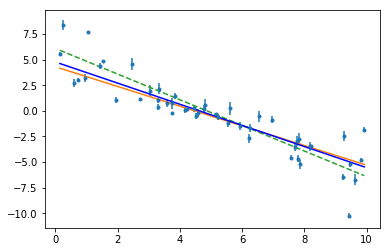

In [32]:
nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [m_true, b_true, np.log(f_true)], args=(x, y, yerr))
m_ml, b_ml, lnf_ml = result["x"]

fx_ml = m_ml * x + b_ml
plt.errorbar(x, y, yerr = yerr, fmt = '.')
plt.plot(x, fx_true)
plt.plot(x, fx_ls, '--')
plt.plot(x, fx_ml, 'b')